In [1]:
import pandas as pd
import mwparserfromhell
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

A METTRE APRES L'ANALYSE DES COMMENTAIRES

In [9]:
df_source = pd.read_csv('wiki-RFA.csv', index_col=0, parse_dates=['Date'])

#we want to compute a source analysis, then we are not interested in source with missing names (as seen in comment analysis)
df_source=df_source[~df_source['Source'].isna()]

#replace nan values in comments by [] for futur operation on comments
df_source['Comment'] = df_source['Comment'].apply(lambda x: [] if pd.isna(x) else x)
df_source["Parsed_Comment"] = df_source.Comment.apply(lambda x: mwparserfromhell.parse(x).strip_code())

In [7]:
df_source

,Source,Target,Vote,Results,Year,Date,Comment,Parsed_Comment
0,Steel1943,BDD,1,1,2013,2013-04-19 23:13:00,'''Support''' as co-nom.,Support as co-nom.
1,Cuchullain,BDD,1,1,2013,2013-04-20 01:04:00,'''Support''' as nominator.--,Support as nominator.--
2,INeverCry,BDD,1,1,2013,2013-04-19 23:43:00,'''Support''' per noms.,Support per noms.
3,Cncmaster,BDD,1,1,2013,2013-04-20 00:11:00,'''Support''' per noms. BDD is a strong contri...,Support per noms. BDD is a strong contributor ...
4,Miniapolis,BDD,1,1,2013,2013-04-20 00:56:00,"'''Support''', with great pleasure. I work wit...","Support, with great pleasure. I work with BDD ..."
...,...,...,...,...,...,...,...,...
198270,172,Vancouverguy,1,1,2003,2003-09-02 02:51:00,Support,Support
198271,Angela,WhisperToMe,1,1,2003,2003-11-26 23:45:00,Support.,Support.
198272,Jiang,WhisperToMe,1,1,2003,NaT,Support. --,Support. --
198273,Pakaran,WhisperToMe,1,1,2003,2003-12-05 05:38:00,Support. Age has nothing to do with maturity....,Support. Age has nothing to do with maturity....


In [10]:
#Count the number of word occurrence without taking into account sop words (the, and, me...)
vectorizer = CountVectorizer(stop_words='english')
df_source['Vectorized_Comment'] = df_source['Parsed_Comment'].apply(lambda x: vectorizer.build_analyzer()(x)) 
df_source['Vector_Size'] = df_source['Vectorized_Comment'].apply(lambda x: len(x))
df_source

,Source,Target,Vote,Results,Year,Date,Comment,Parsed_Comment,Vectorized_Comment,Vector_Size
0,Steel1943,BDD,1,1,2013,2013-04-19 23:13:00,'''Support''' as co-nom.,Support as co-nom.,"[support, nom]",2
1,Cuchullain,BDD,1,1,2013,2013-04-20 01:04:00,'''Support''' as nominator.--,Support as nominator.--,"[support, nominator]",2
2,INeverCry,BDD,1,1,2013,2013-04-19 23:43:00,'''Support''' per noms.,Support per noms.,"[support, noms]",2
3,Cncmaster,BDD,1,1,2013,2013-04-20 00:11:00,'''Support''' per noms. BDD is a strong contri...,Support per noms. BDD is a strong contributor ...,"[support, noms, bdd, strong, contributor, thou...",11
4,Miniapolis,BDD,1,1,2013,2013-04-20 00:56:00,"'''Support''', with great pleasure. I work wit...","Support, with great pleasure. I work with BDD ...","[support, great, pleasure, work, bdd, guild, c...",18
...,...,...,...,...,...,...,...,...,...,...
198270,172,Vancouverguy,1,1,2003,2003-09-02 02:51:00,Support,Support,[support],1
198271,Angela,WhisperToMe,1,1,2003,2003-11-26 23:45:00,Support.,Support.,[support],1
198272,Jiang,WhisperToMe,1,1,2003,NaT,Support. --,Support. --,[support],1
198273,Pakaran,WhisperToMe,1,1,2003,2003-12-05 05:38:00,Support. Age has nothing to do with maturity....,Support. Age has nothing to do with maturity....,"[support, age, maturity]",3


In [16]:
stat_comment_length= df_source.groupby('Source')['Vector_Size'].agg(['mean', 'std'])
stat_comment_length

,mean,std
Source,,
!---slappdash---!,9.000000,NaN
%D0%90,4.230769,4.475002
'sed,7.666667,3.055050
(.Y.),5.000000,NaN
(:Julien:),8.000000,NaN
...,...,...
とある白い猫,20.000000,NaN
シ,20.000000,13.579396
石,1.000000,NaN


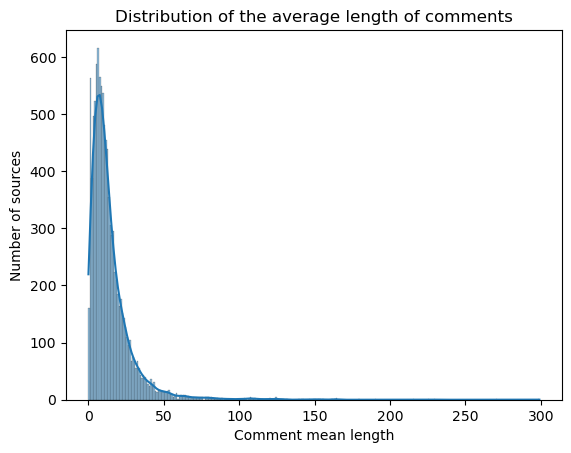

In [45]:
sns.histplot(stat_comment_length['mean'], binwidth=1, kde=True)
plt.xlabel('Comment mean length')
plt.ylabel('Number of sources')
plt.title('Distribution of the average length of comments')
plt.show()